In [12]:
#!/usr/bin/env python3
"""
Cliente multi-thread para fazer requisições HTTP concorrentes.
"""

import threading
import requests
import time
import argparse
from typing import List, Optional
from dataclasses import dataclass


@dataclass
class RequestResult:
    """Resultado de uma requisição HTTP."""
    thread_id: int
    status_code: int
    response_time: float
    success: bool
    error_message: Optional[str] = None


class MultiThreadClient:
    """Cliente que executa requisições HTTP usando múltiplas threads."""
    
    def __init__(self, num_threads: int, url: str = "http://192.168.242.134:7071/primes?count=1000"):
        """
        Inicializa o cliente multi-thread.
        
        Args:
            num_threads: Número de threads a serem criadas
            url: URL para fazer as requisições (default: http://192.168.242.134:7071/primes?count=1000)
        """
        self.num_threads = num_threads
        self.url = url
        self.results: List[RequestResult] = []
        self.results_lock = threading.Lock()
        
    def make_request(self, thread_id: int) -> None:
        """
        Executa uma requisição HTTP em uma thread específica.
        
        Args:
            thread_id: ID da thread atual
        """
        start_time = time.time()
        
        try:
            print(f"Thread {thread_id}: Iniciando requisição para {self.url}")
            response = requests.get(self.url, timeout=30)
            end_time = time.time()
            response_time = end_time - start_time
            
            result = RequestResult(
                thread_id=thread_id,
                status_code=response.status_code,
                response_time=response_time,
                success=response.status_code == 200
            )
            
            print(f"Thread {thread_id}: Concluída - Status: {response.status_code}, Tempo: {response_time:.2f}s")
            
        except requests.exceptions.RequestException as e:
            end_time = time.time()
            response_time = end_time - start_time
            
            result = RequestResult(
                thread_id=thread_id,
                status_code=-1,
                response_time=response_time,
                success=False,
                error_message=str(e)
            )
            
            print(f"Thread {thread_id}: Erro - {e}")
        
        # Thread-safe append dos resultados
        with self.results_lock:
            self.results.append(result)
    
    def run(self) -> List[RequestResult]:
        """
        Executa todas as threads e aguarda a conclusão.
        
        Returns:
            Lista com os resultados de todas as requisições
        """
        print(f"Iniciando {self.num_threads} threads para requisições em {self.url}")
        print("-" * 60)
        
        threads = []
        start_time = time.time()
        
        # Cria e inicia todas as threads
        for i in range(self.num_threads):
            thread = threading.Thread(target=self.make_request, args=(i + 1,))
            threads.append(thread)
            thread.start()
        
        # Aguarda todas as threads terminarem
        for thread in threads:
            thread.join()
        
        end_time = time.time()
        total_time = end_time - start_time
        
        self._print_summary(total_time)
        return self.results
    
    def _print_summary(self, total_time: float) -> None:
        """Imprime um resumo dos resultados."""
        print("-" * 60)
        print("RESUMO DOS RESULTADOS:")
        print(f"Total de threads: {self.num_threads}")
        print(f"Tempo total de execução: {total_time:.2f}s")
        
        successful_requests = sum(1 for r in self.results if r.success)
        failed_requests = len(self.results) - successful_requests
        
        print(f"Requisições bem-sucedidas: {successful_requests}")
        print(f"Requisições falharam: {failed_requests}")
        
        if self.results:
            avg_response_time = sum(r.response_time for r in self.results) / len(self.results)
            min_response_time = min(r.response_time for r in self.results)
            max_response_time = max(r.response_time for r in self.results)
            
            print(f"Tempo médio de resposta: {avg_response_time:.2f}s")
            print(f"Tempo mínimo de resposta: {min_response_time:.2f}s")
            print(f"Tempo máximo de resposta: {max_response_time:.2f}s")
        
        print("-" * 60)


def main():
    """Função principal do programa."""
    parser = argparse.ArgumentParser(description="Cliente multi-thread para requisições HTTP")
    parser.add_argument(
        "num_threads", 
        type=int, 
        help="Número de threads a serem criadas"
    )
    parser.add_argument(
        "--url", 
        default="http://192.168.242.134:7071/primes?count=1000",
        help="URL para fazer as requisições (default: http://192.168.242.134:7071/primes?count=1000)"
    )
    
    args = parser.parse_args()
    
    if args.num_threads <= 0:
        print("Erro: O número de threads deve ser maior que 0")
        return
    
    # Cria e executa o cliente
    client = MultiThreadClient(args.num_threads, args.url)
    results = client.run()
    
    # Opcionalmente, você pode processar os resultados aqui
    # Por exemplo, salvar em um arquivo, fazer análises adicionais, etc.


if __name__ == "__main__":
    num_threads = 30

    url = "http://localhost:30071/primes?count=10000"
    client = MultiThreadClient(num_threads, url)
    results = client.run()
    #main()

Iniciando 30 threads para requisições em http://localhost:30071/primes?count=10000
------------------------------------------------------------
Thread 1: Iniciando requisição para http://localhost:30071/primes?count=10000
Thread 2: Iniciando requisição para http://localhost:30071/primes?count=10000
Thread 3: Iniciando requisição para http://localhost:30071/primes?count=10000
Thread 4: Iniciando requisição para http://localhost:30071/primes?count=10000
Thread 5: Iniciando requisição para http://localhost:30071/primes?count=10000
Thread 6: Iniciando requisição para http://localhost:30071/primes?count=10000
Thread 7: Iniciando requisição para http://localhost:30071/primes?count=10000
Thread 8: Iniciando requisição para http://localhost:30071/primes?count=10000
Thread 1: Concluída - Status: 200, Tempo: 0.42s
Thread 2: Concluída - Status: 200, Tempo: 0.36s
Thread 4: Concluída - Status: 200, Tempo: 0.21s
Thread 9: Iniciando requisição para http://localhost:30071/primes?count=10000
Thread 10:

In [ ]:
# ================================================================
# MONITOR DE MEMÓRIA PROMETHEUS - JUPYTER NOTEBOOK
# Versão otimizada para uso interativo no Jupyter
# ================================================================

import requests
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import time
from typing import List, Dict, Tuple, Optional
import json
import warnings
warnings.filterwarnings('ignore')

# Configurações para Jupyter
%matplotlib inline
plt.style.use('default')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10

class JupyterPrometheusMonitor:
    """Monitor de memória Prometheus otimizado para Jupyter"""
    
    def __init__(self, prometheus_url: str = "http://localhost:9090", 
                 container_name: str = "prime-server",
                 namespace: str = None):
        self.prometheus_url = prometheus_url.rstrip('/')
        self.container_name = container_name
        self.namespace = namespace
        self.last_data = []
        
        print(f"🚀 Monitor inicializado:")
        print(f"   Prometheus: {self.prometheus_url}")
        print(f"   Container: {self.container_name}")
        if self.namespace:
            print(f"   Namespace: {self.namespace}")
    
    def _build_query(self) -> str:
        """Constrói a query do Prometheus"""
        base_query = f'container_memory_working_set_bytes{{container="{self.container_name}"'
        
        if self.namespace:
            base_query += f', namespace="{self.namespace}"'
        
        base_query += '}'
        return base_query
    
    def test_connection(self) -> bool:
        """Testa conexão com Prometheus"""
        print("🔍 Testando conexão com Prometheus...")
        
        try:
            query = self._build_query()
            print(query)
            response = requests.get(
                f"{self.prometheus_url}/api/v1/query",
                params={"query": query},
                timeout=10
            )
            response.raise_for_status()
            
            data = response.json()
            
            if data['status'] != 'success':
                print(f"❌ Erro na query: {data}")
                return False
                
            results = data['data']['result']
            if not results:
                print(f"❌ Container '{self.container_name}' não encontrado")
                return False
            
            memory_bytes = float(results[0]['value'][1])
            memory_mb = memory_bytes / (1024 * 1024)
            
            print(f"✅ Conexão OK!")
            print(f"   Uso atual de memória: {memory_mb:.2f} MB")
            print(f"   Timestamp: {datetime.fromtimestamp(float(results[0]['value'][0]))}")
            
            return True
            
        except requests.exceptions.RequestException as e:
            print(f"❌ Erro de conexão: {e}")
            return False
        except Exception as e:
            print(f"❌ Erro: {e}")
            return False
    
    def get_memory_data(self, duration_minutes: int = 30, 
                       step_seconds: int = 5) -> pd.DataFrame:
        """Coleta dados históricos de memória"""
        print(f"📊 Coletando dados dos últimos {duration_minutes} minutos...")
        
        query = self._build_query()
        end_time = int(time.time())
        start_time = end_time - (duration_minutes * 60)
        
        try:
            response = requests.get(
                f"{self.prometheus_url}/api/v1/query_range",
                params={
                    "query": query,
                    "start": start_time,
                    "end": end_time,
                    "step": f"{step_seconds}s"
                },
                timeout=30
            )
            response.raise_for_status()
            
            data = response.json()
            
            if data['status'] != 'success':
                print(f"❌ Erro na query: {data}")
                return pd.DataFrame()
            
            results = data['data']['result']
            if not results:
                print(f"❌ Nenhum dado encontrado")
                return pd.DataFrame()
            
            # Processa os dados
            timestamps = []
            memory_mb = []
            
            for timestamp, value in results[0]['values']:
                timestamps.append(datetime.fromtimestamp(timestamp))
                memory_mb.append(float(value) / (1024 * 1024))
            
            df = pd.DataFrame({
                'timestamp': timestamps,
                'memory_mb': memory_mb
            })
            
            self.last_data = df.copy()  # Guarda para uso posterior
            
            print(f"✅ Coletados {len(df)} pontos de dados")
            return df
            
        except Exception as e:
            print(f"❌ Erro ao coletar dados: {e}")
            return pd.DataFrame()
    
    def plot_memory_usage(self, df: pd.DataFrame = None, 
                         title_suffix: str = "") -> None:
        """Plota gráfico de uso de memória"""
        if df is None:
            df = self.last_data
        
        if df.empty:
            print("❌ Nenhum dado para plotar")
            return
        
        fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 10))
        
        # Gráfico principal - linha do tempo
        ax1.plot(df['timestamp'], df['memory_mb'], 'b-', linewidth=1.5, alpha=0.8)
        ax1.fill_between(df['timestamp'], df['memory_mb'], alpha=0.3, color='lightblue')
        
        ax1.set_title(f'Uso de Memória - {self.container_name}{title_suffix}', 
                     fontsize=16, fontweight='bold')
        ax1.set_ylabel('Memória (MB)', fontsize=12)
        ax1.grid(True, alpha=0.3)
        
        # Formatação do eixo X
        ax1.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))
        total_minutes = (df['timestamp'].max() - df['timestamp'].min()).total_seconds() / 60
        interval = max(1, int(total_minutes // 10))
        ax1.xaxis.set_major_locator(mdates.MinuteLocator(interval=interval))
        plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45)
        
        # Estatísticas
        stats = {
            'Atual': df['memory_mb'].iloc[-1],
            'Máximo': df['memory_mb'].max(),
            'Mínimo': df['memory_mb'].min(),
            'Média': df['memory_mb'].mean(),
            'Desvio': df['memory_mb'].std()
        }
        
        stats_text = '\n'.join([f'{k}: {v:.2f} MB' for k, v in stats.items()])
        ax1.text(0.02, 0.98, stats_text, transform=ax1.transAxes, 
                fontsize=10, verticalalignment='top',
                bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.9))
        
        # Histograma
        ax2.hist(df['memory_mb'], bins=30, alpha=0.7, color='skyblue', 
                edgecolor='black', density=True)
        ax2.axvline(df['memory_mb'].mean(), color='red', linestyle='--', linewidth=2,
                   label=f'Média: {df["memory_mb"].mean():.2f} MB')
        ax2.axvline(df['memory_mb'].median(), color='green', linestyle='--', linewidth=2,
                   label=f'Mediana: {df["memory_mb"].median():.2f} MB')
        
        ax2.set_xlabel('Memória (MB)', fontsize=12)
        ax2.set_ylabel('Densidade', fontsize=12)
        ax2.set_title('Distribuição do Uso de Memória', fontsize=14)
        ax2.legend()
        ax2.grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.show()
        
        # Imprime estatísticas detalhadas
        print("\n📈 ESTATÍSTICAS DETALHADAS:")
        print("-" * 40)
        for key, value in stats.items():
            print(f"{key:12}: {value:8.2f} MB")
        
        # Análise de variação
        variation = ((stats['Máximo'] - stats['Mínimo']) / stats['Média']) * 100
        print(f"{'Variação':12}: {variation:8.2f} %")
        
        duration = df['timestamp'].max() - df['timestamp'].min()
        print(f"{'Duração':12}: {duration}")
        print(f"{'Pontos':12}: {len(df):8d}")
    
    def plot_memory_trend(self, df: pd.DataFrame = None) -> None:
        """Plota análise de tendência"""
        if df is None:
            df = self.last_data
        
        if df.empty or len(df) < 10:
            print("❌ Dados insuficientes para análise de tendência")
            return
        
        fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 8))
        
        # Tendência linear
        x_numeric = np.arange(len(df))
        z = np.polyfit(x_numeric, df['memory_mb'], 1)
        p = np.poly1d(z)
        trend_line = p(x_numeric)
        
        ax1.plot(df['timestamp'], df['memory_mb'], 'b-', alpha=0.7, label='Dados Reais')
        ax1.plot(df['timestamp'], trend_line, 'r--', linewidth=2, label=f'Tendência: {z[0]:.4f} MB/ponto')
        
        ax1.set_title(f'Análise de Tendência - {self.container_name}', fontsize=14, fontweight='bold')
        ax1.set_ylabel('Memória (MB)')
        ax1.legend()
        ax1.grid(True, alpha=0.3)
        ax1.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))
        plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45)
        
        # Diferenças (variação ponto a ponto)
        df_diff = df['memory_mb'].diff().dropna()
        
        ax2.plot(df['timestamp'][1:], df_diff, 'g-', alpha=0.7)
        ax2.axhline(y=0, color='black', linestyle='-', alpha=0.3)
        ax2.fill_between(df['timestamp'][1:], df_diff, alpha=0.3, color='green')
        
        ax2.set_title('Variação da Memória (MB por intervalo)', fontsize=12)
        ax2.set_ylabel('Δ Memória (MB)')
        ax2.set_xlabel('Tempo')
        ax2.grid(True, alpha=0.3)
        ax2.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))
        plt.setp(ax2.xaxis.get_majorticklabels(), rotation=45)
        
        plt.tight_layout()
        plt.show()
        
        # Estatísticas de tendência
        print("\n📊 ANÁLISE DE TENDÊNCIA:")
        print("-" * 40)
        print(f"Inclinação       : {z[0]:.6f} MB/ponto")
        print(f"Intercepto       : {z[1]:.2f} MB")
        
        total_points = len(df)
        total_change = z[0] * total_points
        print(f"Mudança Total    : {total_change:.2f} MB")
        
        if abs(z[0]) > 0.001:
            trend_desc = "Crescente" if z[0] > 0 else "Decrescente"
        else:
            trend_desc = "Estável"
        print(f"Tendência        : {trend_desc}")
    
    def compare_periods(self, period1_minutes: int = 30, 
                       period2_minutes: int = 30,
                       gap_minutes: int = 0) -> None:
        """Compara dois períodos diferentes"""
        print(f"🔄 Comparando dois períodos:")
        print(f"   Período 1: Últimos {period1_minutes} min")
        print(f"   Período 2: {period1_minutes + gap_minutes} a {period1_minutes + gap_minutes + period2_minutes} min atrás")
        
        # Período 1 (mais recente)
        df1 = self.get_memory_data(period1_minutes, 5)
        
        # Período 2 (mais antigo)
        end_time2 = int(time.time()) - (period1_minutes + gap_minutes) * 60
        start_time2 = end_time2 - (period2_minutes * 60)
        
        query = self._build_query()
        
        try:
            response = requests.get(
                f"{self.prometheus_url}/api/v1/query_range",
                params={
                    "query": query,
                    "start": start_time2,
                    "end": end_time2,
                    "step": "5s"
                },
                timeout=30
            )
            
            data = response.json()
            results = data['data']['result']
            
            timestamps2 = []
            memory_mb2 = []
            
            for timestamp, value in results[0]['values']:
                timestamps2.append(datetime.fromtimestamp(timestamp))
                memory_mb2.append(float(value) / (1024 * 1024))
            
            df2 = pd.DataFrame({
                'timestamp': timestamps2,
                'memory_mb': memory_mb2
            })
            
        except Exception as e:
            print(f"❌ Erro ao coletar período 2: {e}")
            return
        
        if df1.empty or df2.empty:
            print("❌ Dados insuficientes para comparação")
            return
        
        # Plot comparativo
        fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 10))
        
        # Gráficos de linha
        ax1.plot(df1['timestamp'], df1['memory_mb'], 'b-', label=f'Período 1 (recente)', linewidth=2)
        ax1.plot(df2['timestamp'], df2['memory_mb'], 'r-', label=f'Período 2 (antigo)', linewidth=2)
        
        ax1.set_title('Comparação de Períodos', fontsize=14, fontweight='bold')
        ax1.set_ylabel('Memória (MB)')
        ax1.legend()
        ax1.grid(True, alpha=0.3)
        ax1.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))
        plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45)
        
        # Histogramas comparativos
        ax2.hist(df1['memory_mb'], bins=20, alpha=0.6, label='Período 1', color='blue', density=True)
        ax2.hist(df2['memory_mb'], bins=20, alpha=0.6, label='Período 2', color='red', density=True)
        
        ax2.set_xlabel('Memória (MB)')
        ax2.set_ylabel('Densidade')
        ax2.set_title('Distribuição Comparativa')
        ax2.legend()
        ax2.grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.show()
        
        # Estatísticas comparativas
        print("\n📊 COMPARAÇÃO ESTATÍSTICA:")
        print("-" * 50)
        print(f"{'Métrica':<15} {'Período 1':<12} {'Período 2':<12} {'Diferença':<12}")
        print("-" * 50)
        
        metrics = {
            'Média': [df1['memory_mb'].mean(), df2['memory_mb'].mean()],
            'Mediana': [df1['memory_mb'].median(), df2['memory_mb'].median()],
            'Máximo': [df1['memory_mb'].max(), df2['memory_mb'].max()],
            'Mínimo': [df1['memory_mb'].min(), df2['memory_mb'].min()],
            'Desvio Padrão': [df1['memory_mb'].std(), df2['memory_mb'].std()]
        }
        
        for metric, values in metrics.items():
            diff = values[0] - values[1]
            diff_pct = (diff / values[1]) * 100 if values[1] != 0 else 0
            print(f"{metric:<15} {values[0]:<12.2f} {values[1]:<12.2f} {diff:+8.2f} ({diff_pct:+6.1f}%)")
    
    def export_data(self, filename: str = None) -> str:
        """Exporta últimos dados coletados"""
        if self.last_data.empty:
            print("❌ Nenhum dado para exportar")
            return None
        
        if not filename:
            timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
            filename = f"memoria_{self.container_name}_{timestamp}.csv"
        
        self.last_data.to_csv(filename, index=False)
        print(f"✅ Dados exportados para: {filename}")
        print(f"   Registros: {len(self.last_data)}")
        
        return filename

# ================================================================
# FUNÇÕES DE CONVENIÊNCIA PARA JUPYTER
# ================================================================

def quick_monitor(prometheus_url="http://localhost:9090", 
                 container="prime-server", 
                 duration=30):
    """Função rápida para monitoramento básico"""
    monitor = JupyterPrometheusMonitor(prometheus_url, container)
    
    if not monitor.test_connection():
        return None
    
    df = monitor.get_memory_data(duration)
    if not df.empty:
        monitor.plot_memory_usage(df)
    
    return monitor

def stress_analysis(prometheus_url="http://localhost:9090",
                   container="app-degradacao",
                   before_minutes=30,
                   after_minutes=30):
    """Análise de stress comparando antes e depois"""
    monitor = JupyterPrometheusMonitor(prometheus_url, container)
    monitor.compare_periods(after_minutes, before_minutes, 5)
    return monitor

# ================================================================
# EXEMPLO DE USO NO JUPYTER
# ================================================================

print("""
🎯 EXEMPLOS DE USO NO JUPYTER:

1. MONITORAMENTO RÁPIDO:
   monitor = quick_monitor("http://prometheus:9090", "prime-server", 60)

2. ANÁLISE DETALHADA:
   monitor = JupyterPrometheusMonitor("http://prometheus:9090", "prime-server")
   monitor.test_connection()
   data = monitor.get_memory_data(30, 1)  # 30 min, 1s resolução
   monitor.plot_memory_usage(data)
   monitor.plot_memory_trend(data)

3. COMPARAÇÃO DE PERÍODOS:
   monitor.compare_periods(30, 30, 10)  # Compara 30min recentes vs 30min de 40min atrás

4. EXPORTAR DADOS:
   monitor.export_data("meus_dados.csv")

5. ANÁLISE DE STRESS:
   stress_monitor = stress_analysis("http://prometheus:9090", "prime-server", 30, 30)
""")


🎯 EXEMPLOS DE USO NO JUPYTER:

1. MONITORAMENTO RÁPIDO:
   monitor = quick_monitor("http://prometheus:9090", "prime-server", 60)

2. ANÁLISE DETALHADA:
   monitor = JupyterPrometheusMonitor("http://prometheus:9090", "prime-server")
   monitor.test_connection()
   data = monitor.get_memory_data(30, 1)  # 30 min, 1s resolução
   monitor.plot_memory_usage(data)
   monitor.plot_memory_trend(data)

3. COMPARAÇÃO DE PERÍODOS:
   monitor.compare_periods(30, 30, 10)  # Compara 30min recentes vs 30min de 40min atrás

4. EXPORTAR DADOS:
   monitor.export_data("meus_dados.csv")

5. ANÁLISE DE STRESS:
   stress_monitor = stress_analysis("http://prometheus:9090", "prime-server", 30, 30)



In [ ]:
 monitor = quick_monitor("http://localhost:9090", "app-degradacaotest", 60)

🚀 Monitor inicializado:
   Prometheus: http://localhost:9090
   Container: memory-stress-test
🔍 Testando conexão com Prometheus...
container_memory_working_set_bytes{container="memory-stress-test"}
❌ Container 'memory-stress-test' não encontrado


In [11]:
monitor.export_data("meus_dados.csv")

AttributeError: 'NoneType' object has no attribute 'export_data'

✅ Conexão com Prometheus estabelecida com sucesso!
📊 Coletando métricas instantâneas...

  ⏳ cpu_usage_seconds_total... ✅ 3 registros
  ⏳ cpu_system_seconds_total... ⚠️  Sem dados
  ⏳ cpu_user_seconds_total... ⚠️  Sem dados
  ⏳ memory_usage_bytes... ✅ 3 registros
  ⏳ memory_working_set_bytes... ✅ 3 registros
  ⏳ memory_rss... ✅ 3 registros
  ⏳ memory_cache... ✅ 3 registros
  ⏳ memory_swap... ⚠️  Sem dados
  ⏳ memory_max_usage_bytes... ✅ 3 registros
  ⏳ spec_memory_limit_bytes... ⚠️  Sem dados
  ⏳ spec_cpu_quota... ⚠️  Sem dados
  ⏳ spec_cpu_period... ⚠️  Sem dados
  ⏳ network_receive_bytes_total... ✅ 1 registros
  ⏳ network_transmit_bytes_total... ✅ 1 registros
  ⏳ network_receive_packets_total... ✅ 1 registros
  ⏳ network_transmit_packets_total... ✅ 1 registros
  ⏳ fs_usage_bytes... ⚠️  Sem dados
  ⏳ fs_limit_bytes... ⚠️  Sem dados
  ⏳ fs_reads_bytes_total... ✅ 4 registros
  ⏳ fs_writes_bytes_total... ✅ 4 registros

✨ Total coletado: 30 registros

📋 Primeiras linhas do dataset:


,timestamp,metric_name,value,__name__,cpu,endpoint,id,image,instance,job,metrics_path,name,namespace,node,pod,service,container,interface,device
0,2025-10-04T01:09:29.800276,cpu_usage_seconds_total,2.457700e-02,container_cpu_usage_seconds_total,total,https-metrics,/kubepods/burstable/pod9f7102f0-3402-4ac2-8473...,registry.k8s.io/pause:3.10,192.168.242.134:10250,kubelet,/metrics/cadvisor,8855580181c2740a447a59c7f3bf2b801b5b53afad05ac...,tcc-degradacao,x86,app-degradacao-568b78df7f-r7prp,kube-prometheus-stack-kubelet,NaN,NaN,NaN
1,2025-10-04T01:09:29.800283,cpu_usage_seconds_total,3.889336e+02,container_cpu_usage_seconds_total,total,https-metrics,/kubepods/burstable/pod9f7102f0-3402-4ac2-8473...,docker.io/library/degradacao-test:v1,192.168.242.134:10250,kubelet,/metrics/cadvisor,5427f79ad99edb8ebf75f7f02df6d758a0c0dda7d1d7c4...,tcc-degradacao,x86,app-degradacao-568b78df7f-r7prp,kube-prometheus-stack-kubelet,app,NaN,NaN
2,2025-10-04T01:09:29.800286,cpu_usage_seconds_total,3.889635e+02,container_cpu_usage_seconds_total,total,https-metrics,/kubepods/burstable/pod9f7102f0-3402-4ac2-8473...,NaN,192.168.242.134:10250,kubelet,/metrics/cadvisor,NaN,tcc-degradacao,x86,app-degradacao-568b78df7f-r7prp,kube-prometheus-stack-kubelet,NaN,NaN,NaN
3,2025-10-04T01:09:29.818301,memory_usage_bytes,5.789819e+08,container_memory_usage_bytes,NaN,https-metrics,/kubepods/burstable/pod9f7102f0-3402-4ac2-8473...,NaN,192.168.242.134:10250,kubelet,/metrics/cadvisor,NaN,tcc-degradacao,x86,app-degradacao-568b78df7f-r7prp,kube-prometheus-stack-kubelet,NaN,NaN,NaN
4,2025-10-04T01:09:29.818312,memory_usage_bytes,2.293760e+05,container_memory_usage_bytes,NaN,https-metrics,/kubepods/burstable/pod9f7102f0-3402-4ac2-8473...,registry.k8s.io/pause:3.10,192.168.242.134:10250,kubelet,/metrics/cadvisor,8855580181c2740a447a59c7f3bf2b801b5b53afad05ac...,tcc-degradacao,x86,app-degradacao-568b78df7f-r7prp,kube-prometheus-stack-kubelet,NaN,NaN,NaN
5,2025-10-04T01:09:29.818314,memory_usage_bytes,5.691761e+08,container_memory_usage_bytes,NaN,https-metrics,/kubepods/burstable/pod9f7102f0-3402-4ac2-8473...,docker.io/library/degradacao-test:v1,192.168.242.134:10250,kubelet,/metrics/cadvisor,5427f79ad99edb8ebf75f7f02df6d758a0c0dda7d1d7c4...,tcc-degradacao,x86,app-degradacao-568b78df7f-r7prp,kube-prometheus-stack-kubelet,app,NaN,NaN
6,2025-10-04T01:09:29.823206,memory_working_set_bytes,4.373340e+08,container_memory_working_set_bytes,NaN,https-metrics,/kubepods/burstable/pod9f7102f0-3402-4ac2-8473...,NaN,192.168.242.134:10250,kubelet,/metrics/cadvisor,NaN,tcc-degradacao,x86,app-degradacao-568b78df7f-r7prp,kube-prometheus-stack-kubelet,NaN,NaN,NaN
7,2025-10-04T01:09:29.823215,memory_working_set_bytes,2.293760e+05,container_memory_working_set_bytes,NaN,https-metrics,/kubepods/burstable/pod9f7102f0-3402-4ac2-8473...,registry.k8s.io/pause:3.10,192.168.242.134:10250,kubelet,/metrics/cadvisor,8855580181c2740a447a59c7f3bf2b801b5b53afad05ac...,tcc-degradacao,x86,app-degradacao-568b78df7f-r7prp,kube-prometheus-stack-kubelet,NaN,NaN,NaN
8,2025-10-04T01:09:29.823217,memory_working_set_bytes,4.275282e+08,container_memory_working_set_bytes,NaN,https-metrics,/kubepods/burstable/pod9f7102f0-3402-4ac2-8473...,docker.io/library/degradacao-test:v1,192.168.242.134:10250,kubelet,/metrics/cadvisor,5427f79ad99edb8ebf75f7f02df6d758a0c0dda7d1d7c4...,tcc-degradacao,x86,app-degradacao-568b78df7f-r7prp,kube-prometheus-stack-kubelet,app,NaN,NaN
9,2025-10-04T01:09:29.826773,memory_rss,4.272046e+08,container_memory_rss,NaN,https-metrics,/kubepods/burstable/pod9f7102f0-3402-4ac2-8473...,NaN,192.168.242.134:10250,kubelet,/metrics/cadvisor,NaN,tcc-degradacao,x86,app-degradacao-568b78df7f-r7prp,kube-prometheus-stack-kubelet,NaN,NaN,NaN



📊 Informações do dataset:
  • Shape: (30, 19)
  • Métricas únicas: 12
  • Pods monitorados: 1
📈 Coletando séries temporais dos últimos 30 minutos...

  ⏳ cpu_usage_seconds_total... ✅ 183 registros
  ⏳ cpu_system_seconds_total... ⚠️  Sem dados
  ⏳ cpu_user_seconds_total... ⚠️  Sem dados
  ⏳ memory_usage_bytes... ✅ 183 registros
  ⏳ memory_working_set_bytes... ✅ 183 registros
  ⏳ memory_rss... ✅ 183 registros
  ⏳ memory_cache... ✅ 183 registros
  ⏳ memory_swap... ⚠️  Sem dados
  ⏳ memory_max_usage_bytes... ✅ 183 registros
  ⏳ spec_memory_limit_bytes... ⚠️  Sem dados
  ⏳ spec_cpu_quota... ⚠️  Sem dados
  ⏳ spec_cpu_period... ⚠️  Sem dados
  ⏳ network_receive_bytes_total... ✅ 61 registros
  ⏳ network_transmit_bytes_total... ✅ 61 registros
  ⏳ network_receive_packets_total... ✅ 61 registros
  ⏳ network_transmit_packets_total... ✅ 61 registros
  ⏳ fs_usage_bytes... ⚠️  Sem dados
  ⏳ fs_limit_bytes... ⚠️  Sem dados
  ⏳ fs_reads_bytes_total... ⚠️  Sem dados
  ⏳ fs_writes_bytes_total... ⚠️  Se

,timestamp,metric_name,value,__name__,container,cpu,endpoint,id,image,instance,job,metrics_path,name,namespace,node,pod,service,interface
0,2025-10-04 00:39:29,cpu_usage_seconds_total,0.657364,container_cpu_usage_seconds_total,stress,total,https-metrics,/kubepods/burstable/podc7cd8a80-d8ad-4f85-97d4...,docker.io/polinux/stress:latest,192.168.242.134:10250,kubelet,/metrics/cadvisor,d1dc675407aeb658404f381205e8037639e0cf61affe2c...,stress-test,x86,memory-stress-6ff54f5f8-vmqjc,kube-prometheus-stack-kubelet,NaN
1,2025-10-04 00:39:59,cpu_usage_seconds_total,0.657390,container_cpu_usage_seconds_total,stress,total,https-metrics,/kubepods/burstable/podc7cd8a80-d8ad-4f85-97d4...,docker.io/polinux/stress:latest,192.168.242.134:10250,kubelet,/metrics/cadvisor,d1dc675407aeb658404f381205e8037639e0cf61affe2c...,stress-test,x86,memory-stress-6ff54f5f8-vmqjc,kube-prometheus-stack-kubelet,NaN
2,2025-10-04 00:40:29,cpu_usage_seconds_total,0.657390,container_cpu_usage_seconds_total,stress,total,https-metrics,/kubepods/burstable/podc7cd8a80-d8ad-4f85-97d4...,docker.io/polinux/stress:latest,192.168.242.134:10250,kubelet,/metrics/cadvisor,d1dc675407aeb658404f381205e8037639e0cf61affe2c...,stress-test,x86,memory-stress-6ff54f5f8-vmqjc,kube-prometheus-stack-kubelet,NaN
3,2025-10-04 00:40:59,cpu_usage_seconds_total,0.657390,container_cpu_usage_seconds_total,stress,total,https-metrics,/kubepods/burstable/podc7cd8a80-d8ad-4f85-97d4...,docker.io/polinux/stress:latest,192.168.242.134:10250,kubelet,/metrics/cadvisor,d1dc675407aeb658404f381205e8037639e0cf61affe2c...,stress-test,x86,memory-stress-6ff54f5f8-vmqjc,kube-prometheus-stack-kubelet,NaN
4,2025-10-04 00:41:29,cpu_usage_seconds_total,0.657390,container_cpu_usage_seconds_total,stress,total,https-metrics,/kubepods/burstable/podc7cd8a80-d8ad-4f85-97d4...,docker.io/polinux/stress:latest,192.168.242.134:10250,kubelet,/metrics/cadvisor,d1dc675407aeb658404f381205e8037639e0cf61affe2c...,stress-test,x86,memory-stress-6ff54f5f8-vmqjc,kube-prometheus-stack-kubelet,NaN
5,2025-10-04 00:41:59,cpu_usage_seconds_total,0.657390,container_cpu_usage_seconds_total,stress,total,https-metrics,/kubepods/burstable/podc7cd8a80-d8ad-4f85-97d4...,docker.io/polinux/stress:latest,192.168.242.134:10250,kubelet,/metrics/cadvisor,d1dc675407aeb658404f381205e8037639e0cf61affe2c...,stress-test,x86,memory-stress-6ff54f5f8-vmqjc,kube-prometheus-stack-kubelet,NaN
6,2025-10-04 00:42:29,cpu_usage_seconds_total,0.657390,container_cpu_usage_seconds_total,stress,total,https-metrics,/kubepods/burstable/podc7cd8a80-d8ad-4f85-97d4...,docker.io/polinux/stress:latest,192.168.242.134:10250,kubelet,/metrics/cadvisor,d1dc675407aeb658404f381205e8037639e0cf61affe2c...,stress-test,x86,memory-stress-6ff54f5f8-vmqjc,kube-prometheus-stack-kubelet,NaN
7,2025-10-04 00:42:59,cpu_usage_seconds_total,0.657390,container_cpu_usage_seconds_total,stress,total,https-metrics,/kubepods/burstable/podc7cd8a80-d8ad-4f85-97d4...,docker.io/polinux/stress:latest,192.168.242.134:10250,kubelet,/metrics/cadvisor,d1dc675407aeb658404f381205e8037639e0cf61affe2c...,stress-test,x86,memory-stress-6ff54f5f8-vmqjc,kube-prometheus-stack-kubelet,NaN
8,2025-10-04 00:43:29,cpu_usage_seconds_total,0.657390,container_cpu_usage_seconds_total,stress,total,https-metrics,/kubepods/burstable/podc7cd8a80-d8ad-4f85-97d4...,docker.io/polinux/stress:latest,192.168.242.134:10250,kubelet,/metrics/cadvisor,d1dc675407aeb658404f381205e8037639e0cf61affe2c...,stress-test,x86,memory-stress-6ff54f5f8-vmqjc,kube-prometheus-stack-kubelet,NaN
9,2025-10-04 00:43:59,cpu_usage_seconds_total,0.657390,container_cpu_usage_seconds_total,stress,total,https-metrics,/kubepods/burstable/podc7cd8a80-d8ad-4f85-97d4...,docker.io/polinux/stress:latest,192.168.242.134:10250,kubelet,/metrics/cadvisor,d1dc675407aeb658404f381205e8037639e0cf61affe2c...,stress-test,x86,memory-stress-6ff54f5f8-vmqjc,kube-prometheus-stack-kubelet,NaN



🧮 Calculando métricas derivadas...

📊 Dataset completo com métricas derivadas:
  • Total de registros: 1342
  • Métricas disponíveis: 10
📊 Estatísticas por Métrica:



,count,mean,std,min,max
metric_name,,,,,
cpu_usage_seconds_total,183,4.341177e-01,3.157366e-01,0.022354,8.004210e-01
memory_cache,183,2.547130e+04,1.088477e+04,16384.000000,5.734400e+04
memory_max_usage_bytes,183,0.000000e+00,0.000000e+00,0.000000,0.000000e+00
memory_rss,183,1.790150e+08,1.269010e+08,40960.000000,2.685297e+08
memory_usage_bytes,183,1.799478e+08,1.274295e+08,229376.000000,2.706719e+08
memory_working_set_bytes,183,1.799478e+08,1.274295e+08,229376.000000,2.706719e+08
network_receive_bytes_total,61,7.460000e+02,0.000000e+00,746.000000,7.460000e+02
network_receive_packets_total,61,7.000000e+00,0.000000e+00,7.000000,7.000000e+00
network_transmit_bytes_total,61,1.146000e+03,0.000000e+00,1146.000000,1.146000e+03



🎯 Pods Monitorados:



metric_name           timestamp  \
                                  nunique                 min   
pod                                                             
memory-stress-6ff54f5f8-vmqjc          10 2025-10-04 00:39:29   

                                                   
                                              max  
pod                                                
memory-stress-6ff54f5f8-vmqjc 2025-10-04 01:09:29

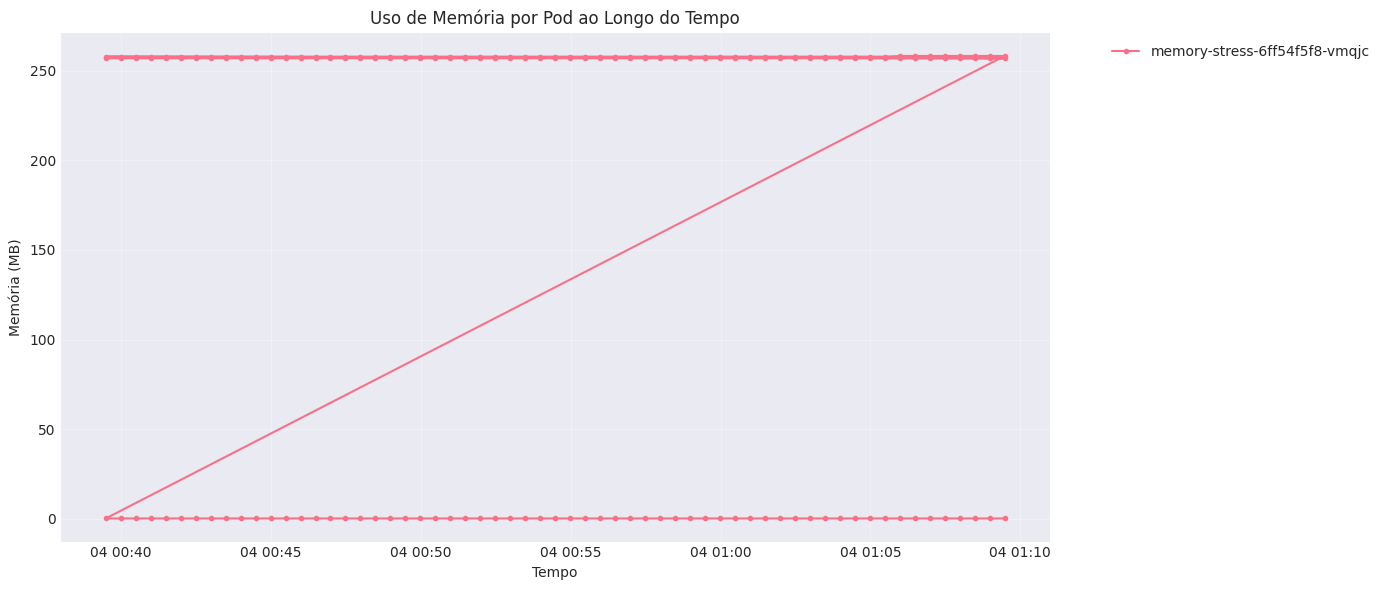

⚠️  Sem dados de percentual de memória


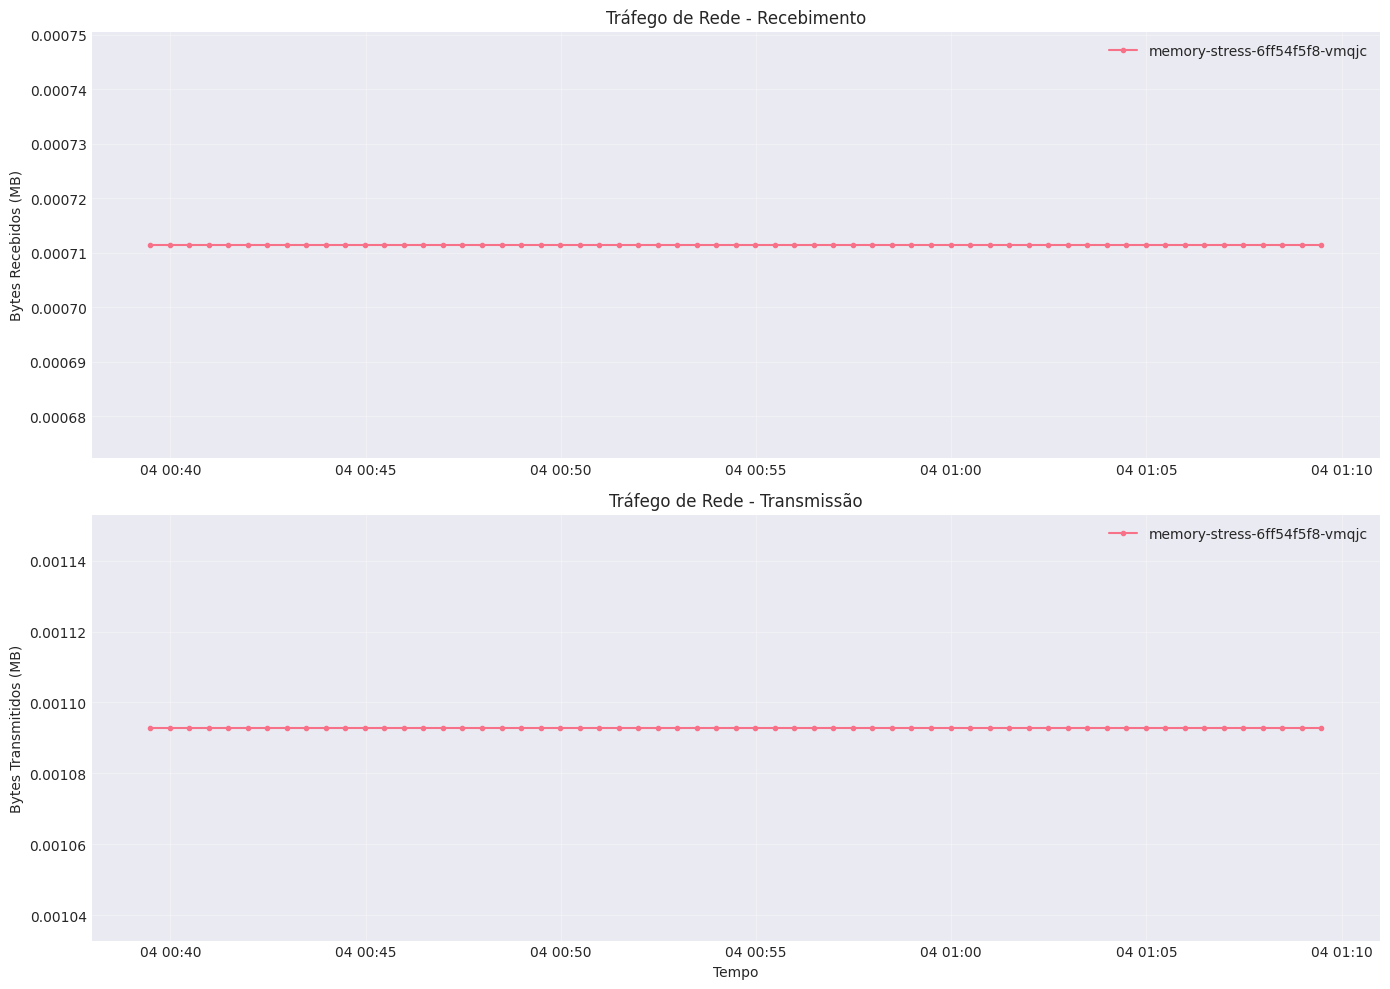

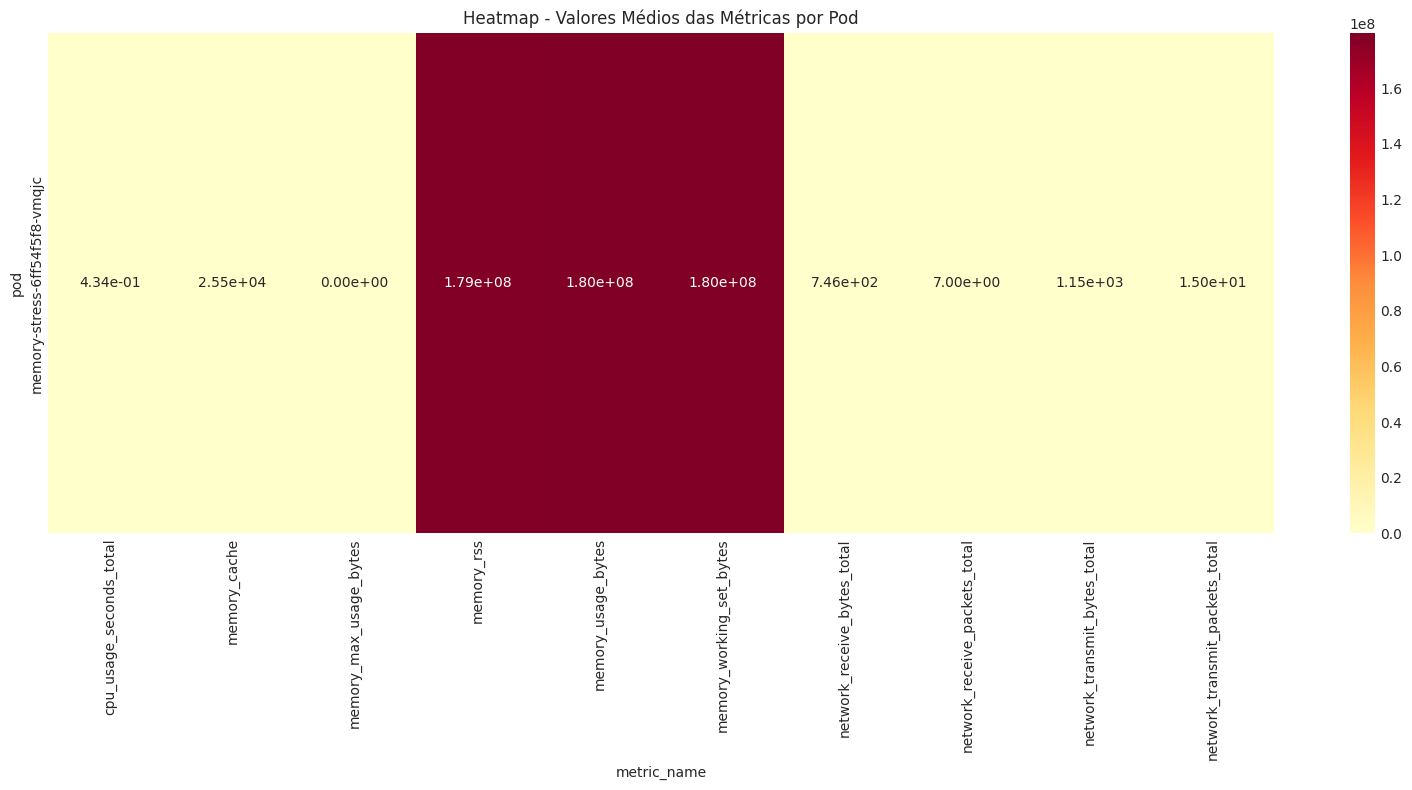

✅ Dataset salvo em: cadvisor_metrics.csv
✅ Dataset salvo em: cadvisor_metrics.xlsx
✅ Dataset salvo em: cadvisor_metrics.parquet

📊 Resultado da Query Customizada:


""



✨ Análise completa! Use os dados para suas investigações.


In [ ]:
# # Coleta de Métricas do cAdvisor via Prometheus
# Notebook para coletar e analisar métricas de containers no Kubernetes

# ## 1. Instalação de Dependências

# !pip install requests pandas matplotlib seaborn plotly

# ## 2. Imports e Configurações

import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

# Configurações de visualização
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

# ## 3. Classe CAdvisorMetricsCollector

class CAdvisorMetricsCollector:
    def __init__(self, prometheus_url='http://localhost:9090'):
        """
        Inicializa o coletor de métricas
        
        Args:
            prometheus_url: URL do Prometheus (ex: http://localhost:9090)
        """
        self.prometheus_url = prometheus_url.rstrip('/')
        self.api_url = f"{self.prometheus_url}/api/v1"
        
    def query_prometheus(self, query):
        """Executa uma query no Prometheus"""
        try:
            response = requests.get(
                f"{self.api_url}/query",
                params={'query': query},
                timeout=30
            )
            response.raise_for_status()
            return response.json()
        except Exception as e:
            print(f"❌ Erro ao executar query: {e}")
            return None
    
    def query_range(self, query, start, end, step='15s'):
        """Executa uma query com range de tempo no Prometheus"""
        try:
            response = requests.get(
                f"{self.api_url}/query_range",
                params={
                    'query': query,
                    'start': start,
                    'end': end,
                    'step': step
                },
                timeout=60
            )
            response.raise_for_status()
            return response.json()
        except Exception as e:
            print(f"❌ Erro ao executar query_range: {e}")
            return None
    
    def get_cadvisor_metrics_list(self):
        """Retorna lista de métricas principais do cAdvisor"""
        return {
            # Métricas de CPU
            'cpu_usage_seconds_total': 'container_cpu_usage_seconds_total',
            'cpu_system_seconds_total': 'container_cpu_system_seconds_total',
            'cpu_user_seconds_total': 'container_cpu_user_seconds_total',
            
            # Métricas de Memória
            'memory_usage_bytes': 'container_memory_usage_bytes',
            'memory_working_set_bytes': 'container_memory_working_set_bytes',
            'memory_rss': 'container_memory_rss',
            'memory_cache': 'container_memory_cache',
            'memory_swap': 'container_memory_swap',
            'memory_max_usage_bytes': 'container_memory_max_usage_bytes',
            
            # Limites e Requests
            'spec_memory_limit_bytes': 'container_spec_memory_limit_bytes',
            'spec_cpu_quota': 'container_spec_cpu_quota',
            'spec_cpu_period': 'container_spec_cpu_period',
            
            # Métricas de Rede
            'network_receive_bytes_total': 'container_network_receive_bytes_total',
            'network_transmit_bytes_total': 'container_network_transmit_bytes_total',
            'network_receive_packets_total': 'container_network_receive_packets_total',
            'network_transmit_packets_total': 'container_network_transmit_packets_total',
            
            # Métricas de Disco
            'fs_usage_bytes': 'container_fs_usage_bytes',
            'fs_limit_bytes': 'container_fs_limit_bytes',
            'fs_reads_bytes_total': 'container_fs_reads_bytes_total',
            'fs_writes_bytes_total': 'container_fs_writes_bytes_total',
        }
    
    def collect_instant_metrics(self, pod_filter=None, namespace=None):
        """
        Coleta métricas instantâneas de todos os containers
        
        Args:
            pod_filter: Filtro opcional para pods (ex: 'memory-stress-.*')
            namespace: Namespace específico
        """
        metrics_list = self.get_cadvisor_metrics_list()
        all_data = []
        
        print("📊 Coletando métricas instantâneas...\n")
        
        for metric_name, metric_query in metrics_list.items():
            filters = []
            if pod_filter:
                filters.append(f'pod=~"{pod_filter}"')
            if namespace:
                filters.append(f'namespace="{namespace}"')
            
            if filters:
                query = f'{metric_query}{{{",".join(filters)}}}'
            else:
                query = metric_query
            
            print(f"  ⏳ {metric_name}...", end=' ')
            result = self.query_prometheus(query)
            
            if result and result['status'] == 'success' and result['data']['result']:
                count = 0
                for item in result['data']['result']:
                    metric_data = {
                        'timestamp': datetime.now().isoformat(),
                        'metric_name': metric_name,
                        'value': float(item['value'][1]) if item['value'][1] != 'NaN' else None,
                    }
                    
                    # Adiciona labels
                    for label, value in item['metric'].items():
                        metric_data[label] = value
                    
                    all_data.append(metric_data)
                    count += 1
                print(f"✅ {count} registros")
            else:
                print("⚠️  Sem dados")
        
        df = pd.DataFrame(all_data)
        print(f"\n✨ Total coletado: {len(df)} registros")
        return df
    
    def collect_time_series(self, duration_minutes=60, step='15s', pod_filter=None, namespace=None):
        """
        Coleta séries temporais de métricas
        
        Args:
            duration_minutes: Duração em minutos para coletar dados históricos
            step: Intervalo entre pontos de dados
            pod_filter: Filtro opcional para pods
            namespace: Namespace específico
        """
        end_time = datetime.now()
        start_time = end_time - timedelta(minutes=duration_minutes)
        
        start_timestamp = int(start_time.timestamp())
        end_timestamp = int(end_time.timestamp())
        
        metrics_list = self.get_cadvisor_metrics_list()
        all_data = []
        
        print(f"📈 Coletando séries temporais dos últimos {duration_minutes} minutos...\n")
        
        for metric_name, metric_query in metrics_list.items():
            filters = []
            if pod_filter:
                filters.append(f'pod=~"{pod_filter}"')
            if namespace:
                filters.append(f'namespace="{namespace}"')
            
            if filters:
                query = f'{metric_query}{{{",".join(filters)}}}'
            else:
                query = metric_query
            
            print(f"  ⏳ {metric_name}...", end=' ')
            result = self.query_range(query, start_timestamp, end_timestamp, step)
            
            if result and result['status'] == 'success' and result['data']['result']:
                count = 0
                for item in result['data']['result']:
                    for timestamp, value in item['values']:
                        metric_data = {
                            'timestamp': datetime.fromtimestamp(timestamp),
                            'metric_name': metric_name,
                            'value': float(value) if value != 'NaN' else None,
                        }
                        
                        # Adiciona labels
                        for label, label_value in item['metric'].items():
                            metric_data[label] = label_value
                        
                        all_data.append(metric_data)
                        count += 1
                print(f"✅ {count} registros")
            else:
                print("⚠️  Sem dados")
        
        df = pd.DataFrame(all_data)
        print(f"\n✨ Total coletado: {len(df)} registros")
        return df
    
    def calculate_derived_metrics(self, df):
        """Calcula métricas derivadas (percentuais, taxas, etc)"""
        print("\n🧮 Calculando métricas derivadas...")
        derived_data = []
        
        # Agrupa por timestamp e container
        if 'pod' in df.columns and 'container' in df.columns:
            groups = df.groupby(['timestamp', 'pod', 'container'])
            
            for (ts, pod, container), group in groups:
                metrics = {}
                extra_labels = {}
                
                for _, row in group.iterrows():
                    metrics[row['metric_name']] = row['value']
                    # Preserva outros labels
                    for col in ['namespace', 'node', 'id']:
                        if col in row:
                            extra_labels[col] = row[col]
                
                # Calcula percentual de memória
                if 'memory_working_set_bytes' in metrics and 'spec_memory_limit_bytes' in metrics:
                    if metrics['spec_memory_limit_bytes'] and metrics['spec_memory_limit_bytes'] > 0:
                        memory_pct = (metrics['memory_working_set_bytes'] / metrics['spec_memory_limit_bytes']) * 100
                        derived_data.append({
                            'timestamp': ts,
                            'pod': pod,
                            'container': container,
                            'metric_name': 'memory_usage_percent',
                            'value': memory_pct,
                            **extra_labels
                        })
                
                # Calcula percentual de disco
                if 'fs_usage_bytes' in metrics and 'fs_limit_bytes' in metrics:
                    if metrics['fs_limit_bytes'] and metrics['fs_limit_bytes'] > 0:
                        disk_pct = (metrics['fs_usage_bytes'] / metrics['fs_limit_bytes']) * 100
                        derived_data.append({
                            'timestamp': ts,
                            'pod': pod,
                            'container': container,
                            'metric_name': 'disk_usage_percent',
                            'value': disk_pct,
                            **extra_labels
                        })
        
        if derived_data:
            derived_df = pd.DataFrame(derived_data)
            print(f"  ✅ {len(derived_df)} métricas derivadas calculadas")
            return pd.concat([df, derived_df], ignore_index=True)
        
        return df

# ## 4. Configuração da Conexão

# **CONFIGURE AQUI a URL do seu Prometheus:**
PROMETHEUS_URL = 'http://localhost:9090'  # Altere conforme necessário

# Inicializa o coletor
collector = CAdvisorMetricsCollector(PROMETHEUS_URL)

# Testa a conexão
try:
    test_query = collector.query_prometheus('up')
    if test_query and test_query['status'] == 'success':
        print("✅ Conexão com Prometheus estabelecida com sucesso!")
    else:
        print("⚠️  Prometheus respondeu, mas pode haver problemas")
except Exception as e:
    print(f"❌ Erro ao conectar com Prometheus: {e}")
    print("   Verifique se a URL está correta e o Prometheus está acessível")

# ## 5. Coleta de Dados

# ### Opção 1: Coleta Instantânea

# Coleta métricas do momento atual
df_instant = collector.collect_instant_metrics(
    pod_filter='app-degradacao.*',  # Altere ou remova o filtro
    namespace='tcc-degradacao'  # Especifique um namespace se necessário
)

# Visualiza os dados
print("\n📋 Primeiras linhas do dataset:")
display(df_instant.head(10))

print("\n📊 Informações do dataset:")
print(f"  • Shape: {df_instant.shape}")
print(f"  • Métricas únicas: {df_instant['metric_name'].nunique()}")
if 'pod' in df_instant.columns:
    print(f"  • Pods monitorados: {df_instant['pod'].nunique()}")

# ### Opção 2: Coleta de Série Temporal

# Coleta dados dos últimos 30 minutos
df_timeseries = collector.collect_time_series(
    duration_minutes=30,
    step='30s',
    pod_filter='memory-stress-.*',
    namespace=None
)

# Visualiza os dados
print("\n📋 Primeiras linhas do dataset:")
display(df_timeseries.head(10))

# ### Calcula Métricas Derivadas

# Aplica apenas se você tiver coletado série temporal
df_complete = collector.calculate_derived_metrics(df_timeseries)

print("\n📊 Dataset completo com métricas derivadas:")
print(f"  • Total de registros: {len(df_complete)}")
print(f"  • Métricas disponíveis: {df_complete['metric_name'].nunique()}")

# ## 6. Análise Exploratória

# ### 6.1 Resumo Estatístico por Métrica

print("📊 Estatísticas por Métrica:\n")
stats = df_complete.groupby('metric_name')['value'].agg(['count', 'mean', 'std', 'min', 'max'])
display(stats.sort_values('count', ascending=False))

# ### 6.2 Lista de Pods Monitorados

if 'pod' in df_complete.columns:
    print("\n🎯 Pods Monitorados:\n")
    pods = df_complete.groupby('pod').agg({
        'metric_name': 'nunique',
        'timestamp': ['min', 'max']
    })
    display(pods)

# ## 7. Visualizações

# ### 7.1 Uso de Memória ao Longo do Tempo

# Filtra dados de memória
memory_data = df_complete[df_complete['metric_name'] == 'memory_working_set_bytes'].copy()

if not memory_data.empty and 'pod' in memory_data.columns:
    # Converte bytes para MB
    memory_data['value_mb'] = memory_data['value'] / (1024 * 1024)
    
    plt.figure(figsize=(14, 6))
    for pod in memory_data['pod'].unique():
        pod_data = memory_data[memory_data['pod'] == pod]
        plt.plot(pod_data['timestamp'], pod_data['value_mb'], label=pod, marker='o', markersize=3)
    
    plt.xlabel('Tempo')
    plt.ylabel('Memória (MB)')
    plt.title('Uso de Memória por Pod ao Longo do Tempo')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
else:
    print("⚠️  Sem dados de memória para visualizar")

# ### 7.2 Percentual de Uso de Memória

memory_pct = df_complete[df_complete['metric_name'] == 'memory_usage_percent'].copy()

if not memory_pct.empty and 'pod' in memory_pct.columns:
    plt.figure(figsize=(14, 6))
    for pod in memory_pct['pod'].unique():
        pod_data = memory_pct[memory_pct['pod'] == pod]
        plt.plot(pod_data['timestamp'], pod_data['value'], label=pod, marker='o', markersize=3)
    
    plt.xlabel('Tempo')
    plt.ylabel('Uso de Memória (%)')
    plt.title('Percentual de Uso de Memória por Pod')
    plt.axhline(y=80, color='orange', linestyle='--', label='Limite Atenção (80%)')
    plt.axhline(y=90, color='red', linestyle='--', label='Limite Crítico (90%)')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
else:
    print("⚠️  Sem dados de percentual de memória")

# ### 7.3 Tráfego de Rede

network_rx = df_complete[df_complete['metric_name'] == 'network_receive_bytes_total'].copy()
network_tx = df_complete[df_complete['metric_name'] == 'network_transmit_bytes_total'].copy()

if not network_rx.empty and not network_tx.empty and 'pod' in network_rx.columns:
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10))
    
    # RX
    for pod in network_rx['pod'].unique():
        pod_data = network_rx[network_rx['pod'] == pod]
        pod_data['value_mb'] = pod_data['value'] / (1024 * 1024)
        ax1.plot(pod_data['timestamp'], pod_data['value_mb'], label=pod, marker='o', markersize=3)
    
    ax1.set_ylabel('Bytes Recebidos (MB)')
    ax1.set_title('Tráfego de Rede - Recebimento')
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    
    # TX
    for pod in network_tx['pod'].unique():
        pod_data = network_tx[network_tx['pod'] == pod]
        pod_data['value_mb'] = pod_data['value'] / (1024 * 1024)
        ax2.plot(pod_data['timestamp'], pod_data['value_mb'], label=pod, marker='o', markersize=3)
    
    ax2.set_xlabel('Tempo')
    ax2.set_ylabel('Bytes Transmitidos (MB)')
    ax2.set_title('Tráfego de Rede - Transmissão')
    ax2.legend()
    ax2.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
else:
    print("⚠️  Sem dados de rede para visualizar")

# ### 7.4 Heatmap de Métricas por Pod

# Cria pivot table
if 'pod' in df_complete.columns:
    pivot_data = df_complete.pivot_table(
        index='pod',
        columns='metric_name',
        values='value',
        aggfunc='mean'
    )
    
    # Seleciona apenas algumas métricas importantes para melhor visualização
    important_metrics = [col for col in pivot_data.columns 
                        if any(x in col for x in ['memory', 'cpu', 'network', 'percent'])]
    
    if important_metrics:
        plt.figure(figsize=(16, 8))
        sns.heatmap(pivot_data[important_metrics], annot=True, fmt='.2e', cmap='YlOrRd')
        plt.title('Heatmap - Valores Médios das Métricas por Pod')
        plt.tight_layout()
        plt.show()

# ## 8. Exportar Dados

# ### Salvar em CSV
df_complete.to_csv('cadvisor_metrics.csv', index=False)
print("✅ Dataset salvo em: cadvisor_metrics.csv")

# ### Salvar em Excel (múltiplas abas)
with pd.ExcelWriter('cadvisor_metrics.xlsx', engine='openpyxl') as writer:
    df_complete.to_excel(writer, sheet_name='Dados Completos', index=False)
    
    # Cria aba com resumo estatístico
    stats_summary = df_complete.groupby('metric_name')['value'].describe()
    stats_summary.to_excel(writer, sheet_name='Estatísticas')
    
    # Cria aba com lista de pods
    if 'pod' in df_complete.columns:
        pods_summary = df_complete.groupby('pod')['metric_name'].value_counts().unstack(fill_value=0)
        pods_summary.to_excel(writer, sheet_name='Pods')

print("✅ Dataset salvo em: cadvisor_metrics.xlsx")

# ### Salvar em Parquet (formato otimizado)
df_complete.to_parquet('cadvisor_metrics.parquet', index=False)
print("✅ Dataset salvo em: cadvisor_metrics.parquet")

# ## 9. Queries Personalizadas

# Você pode executar queries personalizadas do Prometheus:

# Exemplo: Query customizada
custom_query = '''
(container_memory_working_set_bytes{pod=~"app-degradacao.*"} / 
 container_spec_memory_limit_bytes{pod=~"memory-stress-.*"}) * 100
'''

result = collector.query_prometheus(custom_query)
if result and result['status'] == 'success':
    custom_df = pd.DataFrame([
        {
            'pod': item['metric'].get('pod'),
            'container': item['metric'].get('container'),
            'memory_percent': float(item['value'][1])
        }
        for item in result['data']['result']
    ])
    print("\n📊 Resultado da Query Customizada:")
    display(custom_df)

print("\n✨ Análise completa! Use os dados para suas investigações.")